In [15]:
import pandas as pd 
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import tensorflow as tf

#csvfile = "Data_testing_VMC.csv"  #file name 
#csvfile = "Data_testing_PRA.csv"  #file name 
csvfile = "Data_testing_AVF.csv"  #file name 

In [16]:
data_test= pd.read_csv(csvfile)
data_test.head()

,Episode,Kick_Speed,friction,Rewards,Stop_Distance
0,0,73.26,0.9,-7.53,13.67
1,1,40.33,0.9,-28.28,24.39
2,2,40.30,0.9,-28.27,24.39
3,3,40.31,0.9,-28.27,24.39
4,4,76.31,0.9,-35.94,4.42


In [17]:
failed = data_test[data_test['Stop_Distance'] <= 0]
passed = data_test[data_test['Stop_Distance'] > 0]

print('Size of crashes :',failed.shape[0])  
print('Size of success :',passed.shape[0]) 
print("Percentage of crash cases:{:.2f}".format(failed.shape[0]*100/(failed.shape[0]+passed.shape[0])),"%")
print("Percentage of not crashed cases:{:.2f}".format(passed.shape[0]*100/(failed.shape[0]+passed.shape[0])),"%")

#failed.to_csv("crashed.csv",index=False)
#failed.head()

Size of crashes : 1
Size of success : 10
Percentage of crash cases:9.09 %
Percentage of not crashed cases:90.91 %


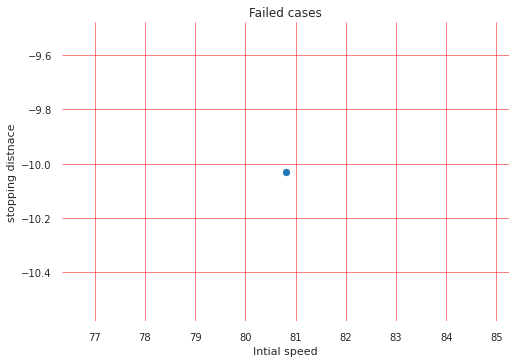

In [18]:
fig=plt.figure
plt.scatter(failed["Kick_Speed"],failed["Stop_Distance"],label='Line 2')
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title("Failed cases")
plt.xlabel("Intial speed")
plt.ylabel("stopping distnace")
plt.show()

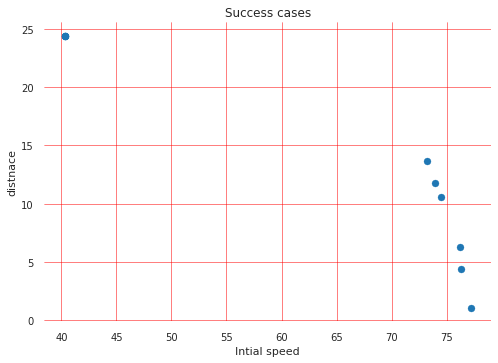

In [19]:
fig=plt.figure
plt.scatter(passed["Kick_Speed"],passed["Stop_Distance"])
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title("Success cases")
plt.xlabel("Intial speed")
plt.ylabel("distnace")
plt.show()

In [20]:
data_test.loc[data_test['Stop_Distance'] <= 0, 'test'] = int(1)
data_test.loc[data_test['Stop_Distance'] > 0, 'test'] = int(0)
data_test.head()

,Episode,Kick_Speed,friction,Rewards,Stop_Distance,test
0,0,73.26,0.9,-7.53,13.67,0.0
1,1,40.33,0.9,-28.28,24.39,0.0
2,2,40.30,0.9,-28.27,24.39,0.0
3,3,40.31,0.9,-28.27,24.39,0.0
4,4,76.31,0.9,-35.94,4.42,0.0


Total number of episodes: 11
Number of Pass: 9
Number of fail: 1


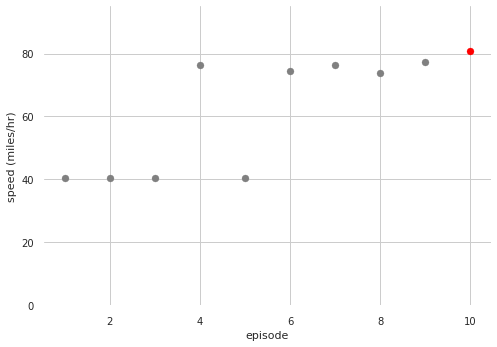

In [21]:
print('Total number of episodes:',data_test['Episode'].shape[0])
start=1
end=6257

fig, ax = plt.subplots()
episode=np.array(data_test['Episode'].values.tolist()[start:end])
test=np.array(data_test['test'].values.tolist()[start:end])
speed=np.array(data_test['Kick_Speed'].values.tolist()[start:end])

indices = test == 0
print('Number of Pass:',indices.sum())
print('Number of fail:',indices.shape[0]-indices.sum())

# normal values
ax.scatter(episode[~indices], speed[~indices], c = 'red',label='fail')
# bad values
ax.scatter(episode[indices], speed[indices], c = 'grey',label='Pass')
#ax.legend()
ax.set_ylim([0,95])
plt.xlabel('episode')
plt.ylabel('speed (miles/hr)')
ax.grid(True) 
plt.show()